# Pruebas DTW

In [1]:
import pandas as pd
import csv

from pandas import DataFrame
import pickle

import matplotlib.pyplot as plt
import numpy as np
import os
import math


In [2]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

In [3]:
sequence1 = [0,1,2,1,3,4,3,2,1,0]
sequence2 = [1,4,0,0,1,2,2,4,3,0]

(<Figure size 640x480 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

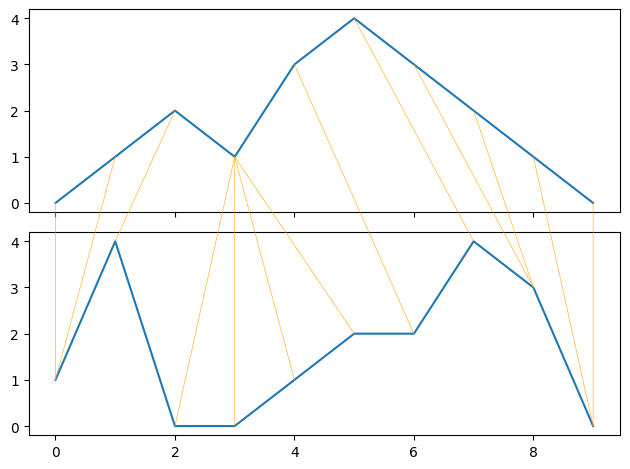

In [4]:
path = dtw.warping_path(sequence1, sequence2)
dtwvis.plot_warping(sequence1, sequence2, path, filename="warp.png")
dtwvis.plot_warping(sequence1, sequence2, path)

In [5]:
distance = dtw.distance(sequence1, sequence2)
print(distance)

3.3166247903554


In [6]:
distance, paths = dtw.warping_paths(sequence1, sequence2)
print("Distance =", distance)
best_path = dtw.best_path(paths)
print("best path =",best_path)
#np.set_printoptions(precision=3)
print(paths)

Distance = 3.3166247903554
best path = [(0, 0), (1, 0), (2, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 6), (5, 7), (6, 8), (7, 8), (8, 9), (9, 9)]
[[0.                inf        inf        inf        inf        inf
         inf        inf        inf        inf        inf]
 [       inf 1.         4.12310563 4.12310563 4.12310563 4.24264069
  4.69041576 5.09901951 6.4807407  7.14142843 7.14142843]
 [       inf 1.         3.16227766 3.31662479 3.46410162 3.46410162
  3.60555128 3.74165739 4.79583152 5.19615242 5.29150262]
 [       inf 1.41421356 2.23606798 3.         3.60555128 3.60555128
  3.46410162 3.46410162 4.         4.12310563 4.58257569]
 [       inf 1.41421356 3.31662479 2.44948974 2.64575131 2.64575131
  2.82842712 3.         4.24264069 4.47213595 4.24264069]
 [       inf 2.44948974 1.73205081 3.46410162 3.87298335 3.31662479
  2.82842712 3.         3.16227766 3.16227766 4.35889894]
 [       inf 3.87298335 1.73205081 4.35889894 5.29150262 4.47213595
  3.46410162 3.46410162 3.      

(<Figure size 1000x1000 with 4 Axes>, [<Axes: >, <Axes: >, <Axes: >, <Axes: >])

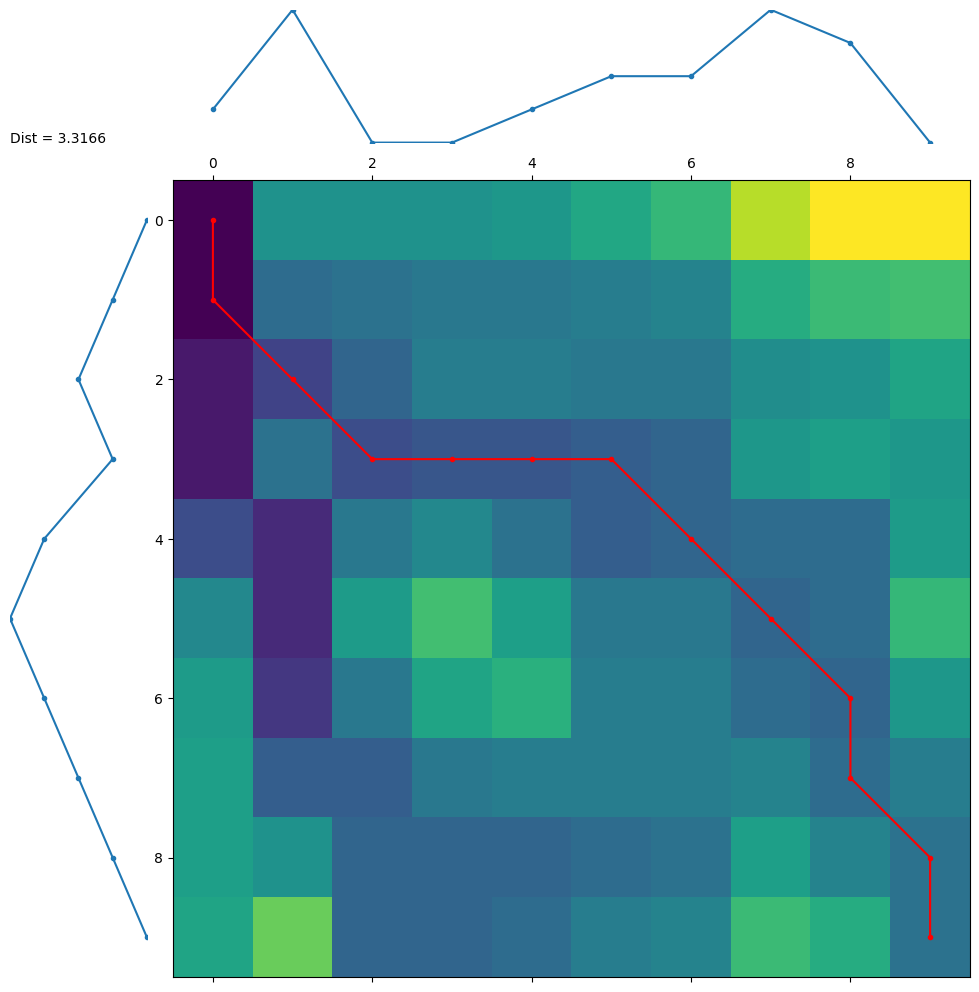

In [7]:
sequence1 = np.array(sequence1)
sequence2 = np.array(sequence2)
dtwvis.plot_warpingpaths(sequence1, sequence2, paths, best_path)

In [8]:
sequence1 = [1,2]
sequence2 = [1,2]
distance = dtw.distance(sequence1, sequence2)
print(distance)

sequence1 = [0,1,2,3]
sequence2 = [4,5,2,3]
distance = dtw.distance(sequence1, sequence2)
print(distance)

sequence1 = [0,1,2,3]
sequence2 = [2,3,2,3]
distance = dtw.distance(sequence1, sequence2)
print(distance)

sequence1 = [0,1,2,0]
sequence2 = [2,1,2,1]
distance = dtw.distance(sequence1, sequence2)
print(distance)


0.0
5.656854249492381
2.449489742783178
2.23606797749979


## Con datos de los videos 

In [9]:
filenames = {
    "cruz_ej": {
        "1" : [
            "cruz_ej1_0.pos",
            "cruz_ej1_3.pos",
            "cruz_ej1_4.pos",
            "cruz_ej1_8.pos",
            "cruz_ej1_12.pos",
            "cruz_ej1_13.pos",
            "cruz_ej1_15.pos",
            "cruz_ej1_21.pos",
            "cruz_ej1_24.pos",
            "cruz_ej1_27.pos",
            "cruz_ej1_35.pos",
            "cruz_ej1_40.pos",
            "cruz_ej1_44.pos",
            "cruz_ej1_48.pos",
            "cruz_ej1_52.pos",
            "cruz_ej1_55.pos",
            "cruz_ej1_57.pos",
            ],
        "2" : [
            "cruz_ej2_1.pos",
            "cruz_ej2_9.pos",
            "cruz_ej2_5.pos",
            "cruz_ej2_14.pos",
            "cruz_ej2_19.pos",
            "cruz_ej2_22.pos",
            "cruz_ej2_23.pos",
            "cruz_ej2_25.pos",
            "cruz_ej2_26.pos",
            "cruz_ej2_28.pos",
            "cruz_ej2_29.pos",
            "cruz_ej2_36.pos",
            "cruz_ej2_37.pos",
            "cruz_ej2_41.pos",
            "cruz_ej2_45.pos",
            "cruz_ej2_47.pos",
            "cruz_ej2_49.pos",
            "cruz_ej2_53.pos",
            "cruz_ej2_60.pos",
        ],
        "3" : [
            "cruz_ej3_2.pos",
            "cruz_ej3_6.pos",
            "cruz_ej3_7.pos",
            "cruz_ej3_10.pos",
            "cruz_ej3_11.pos",
            "cruz_ej3_16.pos",
            "cruz_ej3_17.pos",
            "cruz_ej3_18.pos",
            "cruz_ej3_20.pos",
            "cruz_ej3_43.pos",
            "cruz_ej3_59.pos",
        ],
        "4" : [
            "cruz_ej4_30.pos",
            "cruz_ej4_31.pos",
            "cruz_ej4_32.pos",
            "cruz_ej4_33.pos",
            "cruz_ej4_34.pos",
            "cruz_ej4_38.pos",
            "cruz_ej4_39.pos",
            "cruz_ej4_42.pos",
            "cruz_ej4_46.pos",
            "cruz_ej4_50.pos",
            "cruz_ej4_51.pos",
            "cruz_ej4_54.pos",
            "cruz_ej4_56.pos",
            "cruz_ej4_58.pos",
        ]
    },
    "pelota" : {
        "1" : [
            "pelota1_4.pos",
            "pelota1_7.pos",
            "pelota1_0.pos",
            "pelota1_1.pos",
            "pelota1_11.pos",
            "pelota1_14.pos",
            "pelota1_17.pos",
            "pelota1_20.pos",
            "pelota1_23.pos",
            "pelota1_24.pos",
            "pelota1_28.pos",
            "pelota1_30.pos",
            "pelota1_31.pos",
        ],
        "2": [
            "pelota2_2.pos",
            "pelota2_5.pos",
            "pelota2_8.pos",
            "pelota2_12.pos",
            "pelota2_15.pos",
            "pelota2_18.pos",
            "pelota2_21.pos",
            "pelota2_29.pos",
            "pelota2_32.pos",
        ]
    }
}

In [10]:
'''
Datos
'''
data_path = "../datos/"
path_df = data_path + "DataFrames"
path_csv = data_path + "CSV"

def get_filenames(exercise: str, number: int):
    dataframes = []
    csvs = []
    for i in filenames[exercise][str(number)]:
        actual_df = path_df + os.sep + i + ".df"
        actual_csv = path_csv + os.sep + i + ".csv"
        dataframes.append(actual_df)
        csvs.append(actual_csv)
    return dataframes, csvs

dataframes, csvs = get_filenames("pelota", 1)

In [11]:
def open_csv(csv_name):
    mycsv = pd.read_csv(csv_name)
    mycsv = mycsv.dropna(subset=mycsv.columns.values)
    return mycsv

def open_dataframe(df_name):
    df: DataFrame
    with open(df_name, 'rb') as fp:
            df = pd.read_pickle(fp)
    df = df.dropna(subset=df.columns.values)
    return df


In [12]:
body = ['nariz', 'cuello', 'hombroI', 'hombroD',
       'codoI', 'codoD', 'manoI', 'manoD', 'caderaI', 'caderaD',
       'caderaM', 'rodillaI', 'rodillaD', 'tobilloI', 'tobilloD']

In [13]:
csv_name_1 = csvs[0]
my_csv1 = open_csv(csv_name_1)

csv_name_2 = csvs[1]
my_csv2 = open_csv(csv_name_2)
#my_csv2 = my_csv1.copy()

#### Con puntos del cuerpo

In [14]:
def get_position(df, body_part):
    x = df.loc[:, body_part + "_x"]
    y = df.loc[:, body_part + "_y"] 
    return x, y

def set_position(df, body_part, positions):
    df.loc[:, body_part + "_x"] = positions[0]
    df.loc[:, body_part + "_y"] = positions[1] 

def get_positions_from_df(df):
    positions = []
    positionsx = []
    positionsy = []
    for part in body:
        x, y = get_position(df, part)
        positionsx.append(x) 
        positionsy.append(y)
    
    positions.append(positionsx)
    positions.append(positionsy)
    positions = np.array(positions).reshape(2, len(body))
    return positions

def set_positions_from_df(df, positions):
    x, y = positions
    for i in range(len(x)):
        set_position(df, body[i], (x[i], y[i]))
    return df

def plot_point(positions, show: bool = True):
    x, y = positions
    plt.scatter(x,y, marker='o')
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Pose')

    if show:
        plt.show()

Distancia entre dos sequencias

Sin normalizar
1 = [[849.02356 264.8972 ]
 [762.3198  148.27655]
 [764.16156 107.84765]
 [725.79535 119.71929]
 [850.6941  305.5988 ]
 [852.99536 307.02728]
 [844.7415  319.6171 ]
 [925.4367  184.27635]
 [938.31195 149.78781]
 [926.06134 204.14024]]
2=  [[875.6724  324.08286]
 [751.091   135.12155]
 [865.058   318.80026]
 [857.97516 304.4671 ]
 [858.4983  309.3259 ]
 [919.00555 251.98898]
 [925.9817  180.4731 ]
 [871.14374 307.977  ]
 [870.17334 324.59073]
 [914.13556 180.53241]]
Normalizados
1 = [[0.30640458 0.0955989 ]
 [0.27511402 0.05351161]
 [0.27577869 0.0389212 ]
 [0.26193269 0.04320556]
 [0.30700747 0.11028772]
 [0.30783797 0.11080325]
 [0.30485923 0.11534679]
 [0.33398137 0.06650359]
 [0.33862792 0.05405701]
 [0.33420679 0.07367228]]
2 = [[0.30306924 0.11216472]
 [0.25995176 0.04676542]
 [0.29939561 0.11033641]
 [0.29694425 0.10537572]
 [0.2971253  0.10705735]
 [0.3180668  0.0872131 ]
 [0.32048123 0.06246154]
 [0.30150188 0.1065905 ]
 [0.30116602 0.11234049]
 [0.3163813  0.062

0.15174025155692217

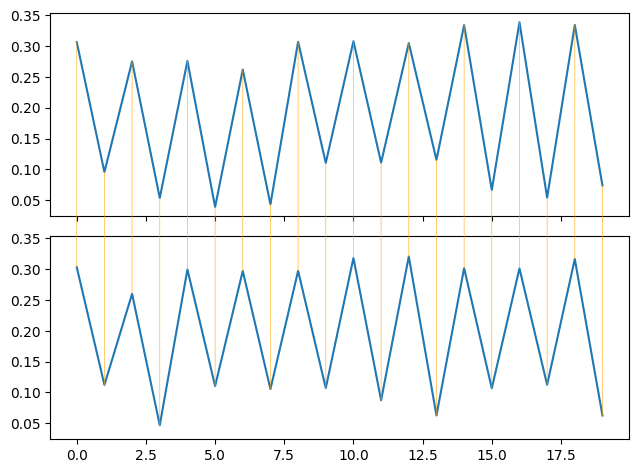

In [15]:
part= "manoI"
angles1 = get_position(my_csv1, part)
angles2 = get_position(my_csv2, part)

angles1 = np.array(angles1).transpose()
angles2 = np.array(angles2).transpose()

#positions1 = positions1[[0, 10, 100, 300, 301, 400],:]
#positions2 = positions2[[0, 1, 10, 30, 401, 405],:]
angles1 = angles1[:1000:100,:]
angles2 = angles2[:2000:200,:]

print("Sin normalizar")
print("1 =", angles1)
print("2= ", angles2)

angles1 = angles1/np.linalg.norm(angles1)
angles2 = angles2/np.linalg.norm(angles2)

print("Normalizados")
print("1 =",angles1)
print("2 =",angles2)

angles1 = angles1.reshape(2*len(angles1),)
angles1 = angles1/np.linalg.norm(angles1)

angles2 = angles2.reshape(2*len(angles2),)
angles2 = angles2/np.linalg.norm(angles2)

print("En una dimension")
print("1 = ", angles1)
print("2 = ", angles2)

path = dtw.warping_path(angles1, angles2)
#np.set_printoptions(precision=3)
print(path)
dtwvis.plot_warping(angles1, angles2, path)
dtw.distance(angles1, angles2)

In [16]:
def normalize(positions):
    #print(np.linalg.norm(positions))
    normalized = positions/np.linalg.norm(positions)
    return normalized

def dtwdis(positions1, positions2,i,j):
    positions1 = positions1.reshape(2*i,)
    positions1 = normalize(positions1)
    
    positions2 = positions2.reshape(2*j,)
    positions2 = normalize(positions2)
    
    return dtw.distance(positions1, positions2)

def distance_dtw(points1, points2):
    scores = []
    for part in body:
        positions1 = np.array(get_position(points1, part)).transpose()
        positions2 = np.array(get_position(points2, part)).transpose()
        positions1 = normalize(positions1)
        positions2 = normalize(positions2)
        scores.append(dtwdis(positions1, positions2, len(positions1), len(positions2)))
    return 1 - np.mean(scores)


In [17]:
print(distance_dtw(my_csv1, my_csv2))

0.5513125133710615


#### Con ángulos

In [18]:
angles_names = ['angCuelloI',
       'angCuelloD', 'angCodoI', 'angCodoD', 'angHombroI', 'angHombroD',
       'angCaderaI', 'angCaderaD', 'angCaderaTorsoI', 'angCaderaTorsoD',
       'angRodillaI', 'angRodillaD']

In [19]:
def get_angle(df, angle_name):
    angle = df.loc[:, angle_name] 
    return angle

def get_angles_from_df(df):
    angles = []
    for i in angles_names:
        angles.append(df.loc[:,i])
    angles = np.array(angles)
    return angles


[(0, 0), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 3), (7, 3), (8, 3), (9, 3), (10, 3), (11, 3), (12, 4), (13, 4), (14, 5), (15, 6), (16, 7), (17, 7), (18, 8), (19, 9), (20, 10), (21, 10), (22, 11), (22, 12), (22, 13), (22, 14), (23, 15), (24, 16), (24, 17), (24, 18), (24, 19), (24, 20), (24, 21), (24, 22), (24, 23), (25, 24), (26, 25), (27, 26), (28, 27), (29, 28), (30, 29), (31, 29), (32, 29), (33, 29), (34, 29), (35, 29), (36, 30), (37, 31), (37, 32), (37, 33), (37, 34), (37, 35), (37, 36), (37, 37), (37, 38), (37, 39), (38, 40), (39, 40), (40, 40), (41, 40), (42, 40), (43, 40), (44, 40), (45, 40), (46, 40), (47, 40), (48, 40), (49, 40), (50, 40), (51, 40), (52, 40), (53, 40), (54, 40), (55, 40), (56, 40), (57, 40), (58, 40), (59, 40), (60, 40), (61, 40), (62, 41), (63, 42), (64, 43), (65, 44), (66, 45), (67, 46), (68, 47), (69, 48), (70, 49), (71, 49), (72, 49), (73, 49), (74, 50), (74, 51), (75, 52), (76, 53), (77, 53), (78, 53), (79, 54), (79, 55), (79, 56), (79, 57), (79, 58),

0.26434663413316134

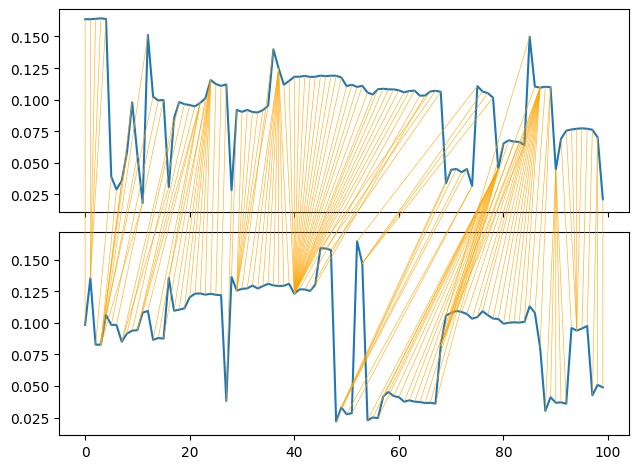

In [20]:
part= "angCodoI"
angles1 = get_angle(my_csv1, part)
angles2 = get_angle(my_csv2, part)

angles1 = np.array(angles1).transpose()
angles2 = np.array(angles2).transpose()

#positions1 = positions1[[0, 10, 100, 300, 301, 400]]
#positions2 = positions2[[0, 1, 10, 30, 401, 405]]
angles1 = angles1[:1000:10]
angles2 = angles2[:2000:20]

#print("Sin normalizar")
#print("1 =", angles1)
#print("2= ", angles2)

angles1 = angles1/np.linalg.norm(angles1)
angles2 = angles2/np.linalg.norm(angles2)

#print("Normalizados")
#print("1 =",angles1)
#print("2 =",angles2)

path = dtw.warping_path(angles1, angles2)
#np.set_printoptions(precision=3)
print(path)
dtwvis.plot_warping(angles1, angles2, path)
dtw.distance(angles1, angles2)

In [21]:
def normalize_angles(angles):
    normalized = angles/np.linalg.norm(angles)
    return normalized

def dtwdis_angles(angles1, angles2):
    a = dtw.distance(angles1, angles2)
    #print(a)
    return a

def distance_dtw_angles_with_distances(points1, points2):
    distances = []
    for angle_name in angles_names:
        angles1 = np.array(get_angle(points1, angle_name)).transpose()
        #print(angles1)
        #print(np.linalg.norm(angles1))
        angles2 = np.array(get_angle(points2, angle_name)).transpose()
        angles1 = normalize_angles(angles1)
        angles2 = normalize_angles(angles2)
        
        distances.append(dtwdis_angles(angles1, angles2))
    return distances, 1 - np.mean(distances)

def distance_dtw_angles(points1, points2):
    score = distance_dtw_angles_with_distances(points1, points2)[1]
    return score

In [22]:
print(distance_dtw_angles(my_csv1, my_csv2))

0.7099762339967188


# Comparacion de ejercicios

In [23]:
_, csvs1 = dataframes, csvs = get_filenames("cruz_ej", 1)
_, csvs2 = dataframes, csvs = get_filenames("cruz_ej", 2)
_, csvs3 = dataframes, csvs = get_filenames("pelota", 2)

csv1 = csvs1[0]
csv2 = csvs1[1]

csv3 = csvs2[0]

csv4 = csvs3[0]

my_csv1 = open_csv(csv1)
my_csv2 = open_csv(csv2)
my_csv3 = open_csv(csv3)
my_csv4 = open_csv(csv4)

In [24]:
print("Puntos")
print(distance_dtw(my_csv1, my_csv2))
print(distance_dtw(my_csv2, my_csv3))
print(distance_dtw(my_csv1, my_csv4))
print(distance_dtw(my_csv2, my_csv4))

print("Angulos")
print(distance_dtw_angles(my_csv1, my_csv2))
print(distance_dtw_angles(my_csv2, my_csv3))
print(distance_dtw_angles(my_csv1, my_csv4))
print(distance_dtw_angles(my_csv2, my_csv4))

Puntos
0.7869016135265752
0.7767276427281202
0.7048678930064576
0.8185833434380825
Angulos
0.8859530749167541
0.8663066317240987
0.7652248316406137
0.823691783725889


In [25]:
print("Distancias de los angulos")
print(distance_dtw_angles_with_distances(my_csv1, my_csv2)[0])
print(distance_dtw_angles_with_distances(my_csv2, my_csv3)[0])
print(distance_dtw_angles_with_distances(my_csv1, my_csv4)[0])
print(distance_dtw_angles_with_distances(my_csv2, my_csv4)[0])

Distancias de los angulos
[0.19475779645482624, 0.2102168420830229, 0.1055551467657195, 0.08104407416397368, 0.10601841733695186, 0.11891218024950621, 0.12157037436742105, 0.12261436575231745, 0.08747481605532124, 0.05976819779293636, 0.07107462528730508, 0.08955626468964874]
[0.21166975580113984, 0.23354924065338964, 0.13371111908392652, 0.11852751061516477, 0.11091040611023102, 0.11465756853188606, 0.13685289050671712, 0.14854603915091846, 0.09371153986526161, 0.09879657280591718, 0.07078943238829914, 0.13259834379796362]
[0.2284062021852903, 0.2428731824012729, 0.3232931970041955, 0.2806141390963708, 0.4450356601804106, 0.5286975788294519, 0.12425207531900172, 0.1343523201509935, 0.14566818515600233, 0.12883599848882618, 0.11711905301002433, 0.11815442849079587]
[0.18390625473632527, 0.14493370651155035, 0.24946196159627276, 0.27729960464641173, 0.39661983309535065, 0.4516372034699297, 0.05086384059813785, 0.060644252335469044, 0.09176885542599099, 0.09461430443542454, 0.06087796097